In [1]:
import pandas as pd
import numpy as np
import fyp_functions as fyp
import matplotlib.pyplot as plt

In [2]:
n = 3
m = 3

In [ ]:
P = np.array([[0.19, 0.45, 0.36],
       [0.58, 0.24, 0.18],
       [0.63, 0.28, 0.09]])

array([[0.19, 0.45, 0.36],
       [0.58, 0.24, 0.18],
       [0.63, 0.28, 0.09]])

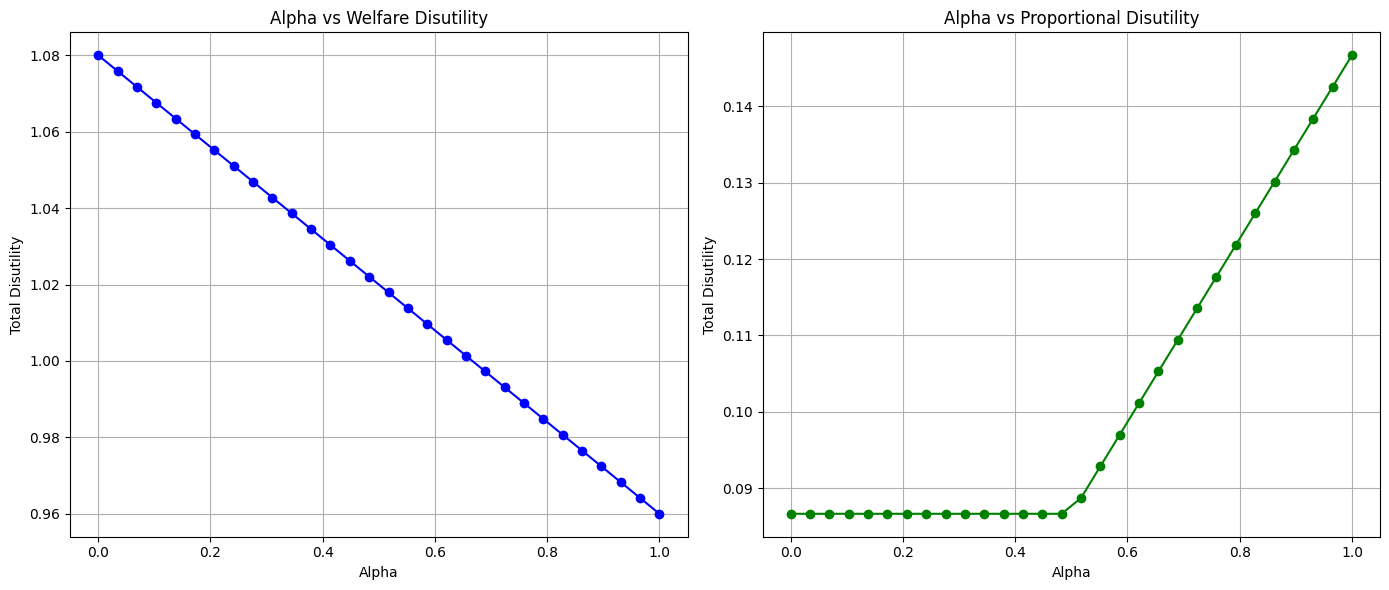

In [ ]:
#P = fyp.generate_random_preferences(n, m)
alpha_values = np.linspace(0, 1, 30)

# Compute disutilities for both types
df_welfare = fyp.iterate_over_alphas(n, m, P, alpha_values, disutility_type='welfare')
df_proportional = fyp.iterate_over_alphas(n, m, P, alpha_values, disutility_type='proportional')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=False)

# Plot Welfare Disutility
axes[0].plot(df_welfare['alpha'], df_welfare['disutility'], marker='o', color='blue')
axes[0].set_title('Alpha vs Welfare Disutility')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('Total Disutility')
axes[0].grid(True)

# Plot Proportional Disutility
axes[1].plot(df_proportional['alpha'], df_proportional['disutility'], marker='o', color='green')
axes[1].set_title('Alpha vs Proportional Disutility')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Total Disutility')
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
P

In [ ]:
np.mean(P,axis=0)

In [6]:
allocation, _ = fyp.independent_market_mechanism(n, m, P)
#fyp.compute_disutilities(P,allocation_IMM,type='proportional')

In [ ]:
allocation 

In [7]:
np.sum(np.abs(np.mean(P,axis=0) - allocation))

np.float64(0.06000000029802319)

In [ ]:
np.sum(np.abs(P - allocation), axis=1)